<a href="https://colab.research.google.com/github/Peter5793/start/blob/master/Student_retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data on student retention experiment
We are currently using the drop-out detective data to correlate the answers from the student profile and their perfomance.
[student retention](https://docs.google.com/spreadsheets/d/1zHlkI4NeWrX6oY5qXMi0LJJqa9boNBdow3WWt2SMM_A/edit#gid=0)


In [165]:
#import packages to read form google drive
from google.colab import drive
drive.mount ('/content/drive/',force_remount=True)


Mounted at /content/drive/


In [166]:
#install gspread to read data from google drive
!pip install --upgrade -q gspread
!pip install gspread-dataframe

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gspread_dataframe import get_as_dataframe, set_with_dataframe
%matplotlib inline
import pandas as pd
from matplotlib import  style

In [168]:

#Account authentication 
import gspread
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [169]:
#Getting the student retention spreadsheet
retention = gc.open_by_url("https://docs.google.com/spreadsheets/d/1zHlkI4NeWrX6oY5qXMi0LJJqa9boNBdow3WWt2SMM_A/edit#gid=0")

In [170]:
ws = retention.worksheet('Combined Ed and Work')
retention_sd = get_as_dataframe(ws)
retention_sd.head()

,Name,Class,e-mail,Category,Education profile,Work Profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Average scale score,Risk 1,Risk 2,Risk 3,Risk 4,IP 1,IP 2,IP 3,IP 4,Average IP Score,Interested in Core?,Enrolled to Core,Roll Call
0,Thomas,Oduor,oduorthomas14@gmail.com,Access,UG,No exp,0.0,5,5,5,5,4,5,4.833333,0.0,1.0,1.0,0,98.14,74.15,96.50,81.78,87.6425,Yes,Yes,86
1,Sheilla,Wangare Njoroge,sheillan.njoroge@gmail.com,Access,UG,No exp,0.0,3,4,4,5,5,5,4.333333,1.0,1.0,5.0,1,96.86,72.46,95.45,80.08,86.2125,Yes,Yes,100
2,Brian,Njogu,briannjogu85@gmail.com,Self-sponsored,CUUS,No exp,9.0,5,4,5,5,5,5,4.833333,1.0,1.0,1.0,No record,97.17,71.82,94.70,79.45,85.785,Yes,No,Dropped
3,Ariso,Okanga Imelda,arisodee@gmail.com,Access,UG,No exp,0.0,5,5,5,5,5,5,5.000000,1.0,1.0,4.0,1,91.93,70.55,91.75,77.75,82.995,Yes,Yes,100
4,Barnabas,Kamau Nyambura,bkamau032@gmail.com,Access,HSG,Experienced,0.0,5,4,5,5,5,5,4.833333,1.0,1.0,4.0,1,93.08,69.28,90.91,76.27,82.385,Yes,Yes,100


In [171]:
retention_sd =  retention_sd.dropna()#Drop the blank cells

In [172]:
retention_sd = retention_sd.fillna(0) # replace the nan with 0

In [173]:
retention_sd.isnull().sum() #check for any NaN Values in the data set

Name                                                                               0
Class                                                                              0
e-mail                                                                             0
Category                                                                           0
Education profile                                                                  0
Work Profile                                                                       0
Lead Score                                                                         0
On a scale of 5, what's your ability to work independently                         0
I follow through with my goals even when going through tough times                 0
I believe failure is a part of the learning process                                0
I work as hard as I can, ask questions, and make use of all available resources    0
Even if I wasn’t “born talented” I can still develop talent for s

In [179]:
plt.figure(figsize=(15,10))
sns.histplot(data=retention_sd, x="Average IP Score", bins=20, hue= 'Enrolled to Core')


TypeError: ignored

In [ ]:
#drop the name class and e-mail columns
# we will not be needing it in the final anaylsis
retention_sd.drop(['Name', 'Class', 'e-mail','Risk 4'], axis= 1, inplace= True)

In [ ]:
retention_sd.shape
retention_sd.head()

,Name,Class,e-mail,Category,Education profile,Work Profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Average scale score,Risk 1,Risk 2,Risk 3,Risk 4,IP 1,IP 2,IP 3,IP 4,Average IP Score,Interested in Core?,Enrolled to Core,Roll Call
0,Thomas,Oduor,oduorthomas14@gmail.com,Access,UG,No exp,0.0,5,5,5,5,4,5,4.833333,0.0,1.0,1.0,0,98.14,74.15,96.50,81.78,87.6425,Yes,Yes,86
1,Sheilla,Wangare Njoroge,sheillan.njoroge@gmail.com,Access,UG,No exp,0.0,3,4,4,5,5,5,4.333333,1.0,1.0,5.0,1,96.86,72.46,95.45,80.08,86.2125,Yes,Yes,100
2,Brian,Njogu,briannjogu85@gmail.com,Self-sponsored,CUUS,No exp,9.0,5,4,5,5,5,5,4.833333,1.0,1.0,1.0,No record,97.17,71.82,94.70,79.45,85.7850,Yes,No,Dropped
3,Ariso,Okanga Imelda,arisodee@gmail.com,Access,UG,No exp,0.0,5,5,5,5,5,5,5.000000,1.0,1.0,4.0,1,91.93,70.55,91.75,77.75,82.9950,Yes,Yes,100
4,Barnabas,Kamau Nyambura,bkamau032@gmail.com,Access,HSG,Experienced,0.0,5,4,5,5,5,5,4.833333,1.0,1.0,4.0,1,93.08,69.28,90.91,76.27,82.3850,Yes,Yes,100


In [ ]:
# Get the statistical summary of the data 
from google.colab import  files
retention_sd.describe()

,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Average scale score,Risk 1,Risk 2,Risk 3,IP 1,IP 2,IP 3,IP 4
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,4.508065,4.000000,4.354839,4.274194,4.564516,4.629032,4.741935,4.427419,1.790323,2.370968,4.370968,92.284839,58.989516,88.830968,66.106935
std,6.438544,0.809776,0.925004,1.010913,0.781360,0.706733,0.675945,0.638490,4.581277,5.384355,8.353332,6.795950,7.342727,8.302450,8.705175
min,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.333333,0.000000,0.000000,1.000000,60.690000,37.290000,56.290000,37.290000
25%,0.000000,3.250000,4.000000,4.000000,4.000000,4.000000,5.000000,4.166667,1.000000,1.000000,1.000000,90.505000,55.667500,86.450000,62.762500
50%,0.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.666667,1.000000,1.000000,1.000000,93.965000,59.320000,91.550000,66.420000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.833333,1.000000,1.000000,4.000000,96.880000,61.755000,93.570000,71.292500
max,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,35.000000,29.000000,43.000000,99.220000,74.150000,98.200000,81.780000


In [ ]:
retention_sd.to_csv('Retention_summary.csv')
files.download('Retention_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Get the number of students to assess the conversion rate
retention_sd['Work Profile'].count()
#Number of those interested in joining the core program and joined the core
retention_joined = retention_sd[(retention_sd['Interested in Core?']=='Yes') & (retention_sd['Paid for Core?']== "Yes")]

Conversion_rate = retention_joined['Work Profile'].count()/ retention_sd['Work Profile'].count() * 100
print('The current conversion rate is  ', Conversion_rate)

The current conversion rate is   77.41935483870968


In [177]:

plt.figure(figsize=(15,10))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
plt.style.use('ggplot')

sns.regplot(x='IP 1', y='')
axes[0].set_title('IP 1 Category and IP Score distribution', color="white")
sns.stripplot(ax = axes[0], x='Category', y='IP 1', data=cat_df, sizes=(200,200), alpha= 0.7,hue = 'Paid for Core?')
axes[1].set_title('IP 2 Category and IP Score distribution', color="white")
sns.stripplot(ax = axes[1], x='Category', y='IP 2', data=cat_df, sizes=(200,200), alpha= 0.7, hue = 'Paid for Core?')
axes[2].set_title('IP 3 Category and IP Score distribution', color="white")
sns.stripplot(ax = axes[2], x='Category', y='IP 3', data=cat_df, sizes=(200,200), alpha= 0.7,hue = 'Paid for Core?')
axes[3].set_title('IP 4 Category and IP Score distribution', color="white")
sns.stripplot(ax = axes[3], x='Category', y='IP 4', data=cat_df, sizes=(200,200), alpha= 0.7,hue = 'Paid for Core?')


TypeError: ignored

# Conversion rate


---



---


The approximate conversion rate for  MPFT 36 - core is 73% based on the sample that was used (65 students). This are those who expressed interest and proceeded to make the payments.

In [ ]:
# Analysis of the students with work experience and how they were able to perform in the respective IPS
# turning into a data frame 
work_df = pd.DataFrame(retention_sd[['Work Profile','IP 1', 'IP 2', 'IP 3','IP 4','Interested in Core?', 'Paid for Core?']])
print(work_df)
print(work_df.groupby(['Work Profile']).count())

   Work Profile   IP 1   IP 2   IP 3   IP 4 Interested in Core? Paid for Core?
0            No  98.14  74.15  96.50  81.78                 Yes            Yes
1            No  96.86  72.46  95.45  80.08                 Yes            Yes
2            No  97.17  71.82  94.70  79.45                 Yes             No
3            No  91.93  70.55  91.75  77.75                 Yes            Yes
4           Yes  93.08  69.28  90.91  76.27                 Yes            Yes
..          ...    ...    ...    ...    ...                 ...            ...
62          Yes  92.58  50.21  91.61  59.50                 Yes            Yes
63           No  89.45  47.67  79.88  56.53                 Yes            Yes
65          Yes  60.69  40.68  68.28  41.95                  No            Yes
67           No  76.56  39.41  56.29  39.83                  No            Yes
68           No  71.74  37.29  56.41  37.29                  No            Yes

[62 rows x 7 columns]
              IP 1  IP 2  IP 

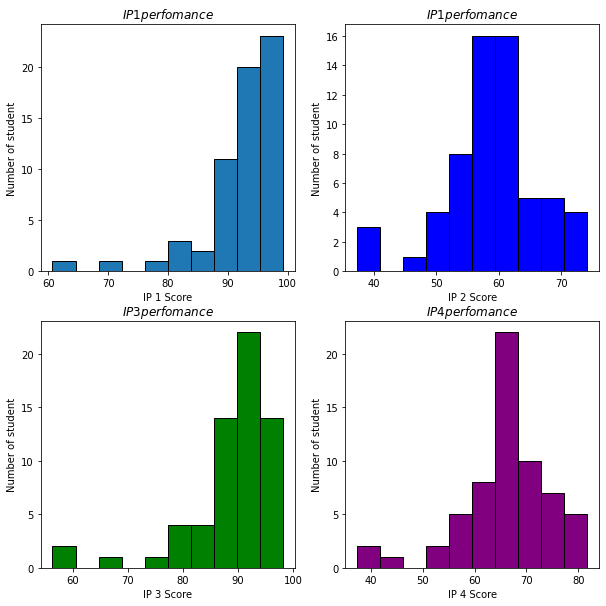

In [ ]:
#combined distribution of the scores
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

plt.hist(work_df['IP 1'],bins=10,edgecolor= 'black')
plt.title('$IP 1 perfomance$')
plt.xlabel('IP 1 Score')
plt.ylabel('Number of student')
plt.subplot(2,2,2)
plt.hist(work_df['IP 2'],bins=10,edgecolor= 'black', color='blue')
plt.title('$IP 1 perfomance$')
plt.xlabel('IP 2 Score')
plt.ylabel('Number of student')
plt.subplot(2,2,3)
plt.hist(work_df['IP 3'],bins=10,edgecolor= 'black', color= 'green')
plt.title('$IP 3 perfomance$')
plt.xlabel('IP 3 Score')
plt.ylabel('Number of student')
plt.subplot(2,2,4)
plt.hist(work_df['IP 4'],bins=10,edgecolor= 'black', color= 'purple')
plt.title('$IP 4 perfomance$')
plt.xlabel('IP 4 Score')
plt.ylabel('Number of student');

In [ ]:
# seperating the two into work profiles into respective categories
yes_work = work_df[work_df['Work Profile'] == 'Yes']
print(yes_work.head())

no_work =  work_df[work_df['Work Profile'] == 'No']
print(no_work.head())


   Work Profile   IP 1   IP 2   IP 3   IP 4 Interested in Core? Paid for Core?
4           Yes  93.08  69.28  90.91  76.27                 Yes            Yes
13          Yes  92.62  65.89  91.49  72.88                 Yes            Yes
16          Yes  98.46  61.44  97.51  69.83                 Yes            Yes
25          Yes  96.88  59.75  94.63  70.97                 Yes            Yes
39          Yes  95.70  58.47  93.71  66.31                 Yes            Yes
  Work Profile   IP 1   IP 2   IP 3   IP 4 Interested in Core? Paid for Core?
0           No  98.14  74.15  96.50  81.78                 Yes            Yes
1           No  96.86  72.46  95.45  80.08                 Yes            Yes
2           No  97.17  71.82  94.70  79.45                 Yes             No
3           No  91.93  70.55  91.75  77.75                 Yes            Yes
5           No  89.94  68.27  87.84  75.00                 Yes            Yes


In [ ]:
#Statistical summary for the ons with no work experience 
no_work_sum = no_work.describe()
#no_work.to_csv('No work experience.csv')
#files.download('No work experience.csv')

In [ ]:
no_work_sum.to_csv('No work experience.csv')
files.download('No work experience.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Statistical summary with the ones with work experience 
yes_work_sum = yes_work.describe()

In [ ]:
yes_work_sum.to_csv('Yes Work experience.csv')
files.download('Yes Work experience.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

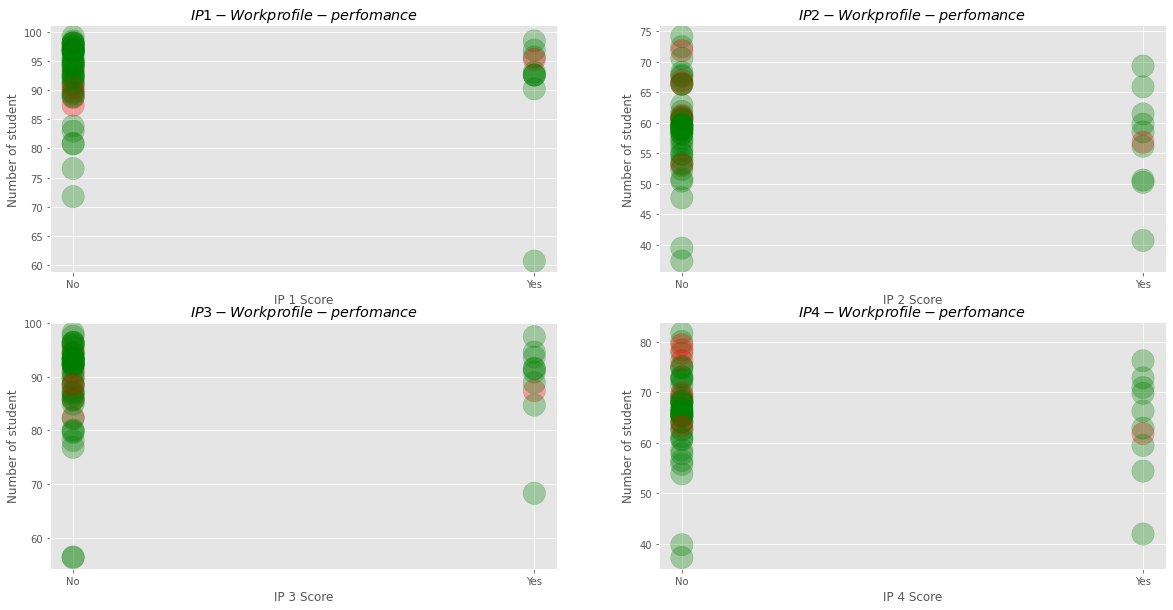

In [ ]:
plt.figure(figsize=(20,10))
colors = {'Yes': 'Green', 'No': 'Red'}
plt.subplot(2,2,1)

plt.scatter(x=work_df['Work Profile'], y=work_df['IP 1'], c=work_df['Paid for Core?'].map(colors),s=500,alpha=0.3)
plt.title('$IP 1-Work profile -perfomance$')
plt.xlabel('IP 1 Score')
plt.ylabel('Number of student')

plt.subplot(2,2,2)
plt.scatter(x=work_df['Work Profile'], y=work_df['IP 2'], c=work_df['Paid for Core?'].map(colors),s=500,alpha=0.3)
plt.title('$IP 2-Work profile -perfomance$')
plt.xlabel('IP 2 Score')
plt.ylabel('Number of student')
plt.subplot(2,2,3)
plt.scatter(x=work_df['Work Profile'], y=work_df['IP 3'], c=work_df['Paid for Core?'].map(colors),s=500,alpha=0.3)
plt.title('$IP 3-Work profile -perfomance$')
plt.xlabel('IP 3 Score')
plt.ylabel('Number of student')
plt.subplot(2,2,4)
plt.scatter(x=work_df['Work Profile'], y=work_df['IP 4'], c=work_df['Paid for Core?'].map(colors),s=500,alpha=0.3)
plt.title('$IP 4-Work profile -perfomance$')
plt.xlabel('IP 4 Score')
plt.ylabel('Number of student');
plt.show()

<Figure size 1080x1440 with 0 Axes>

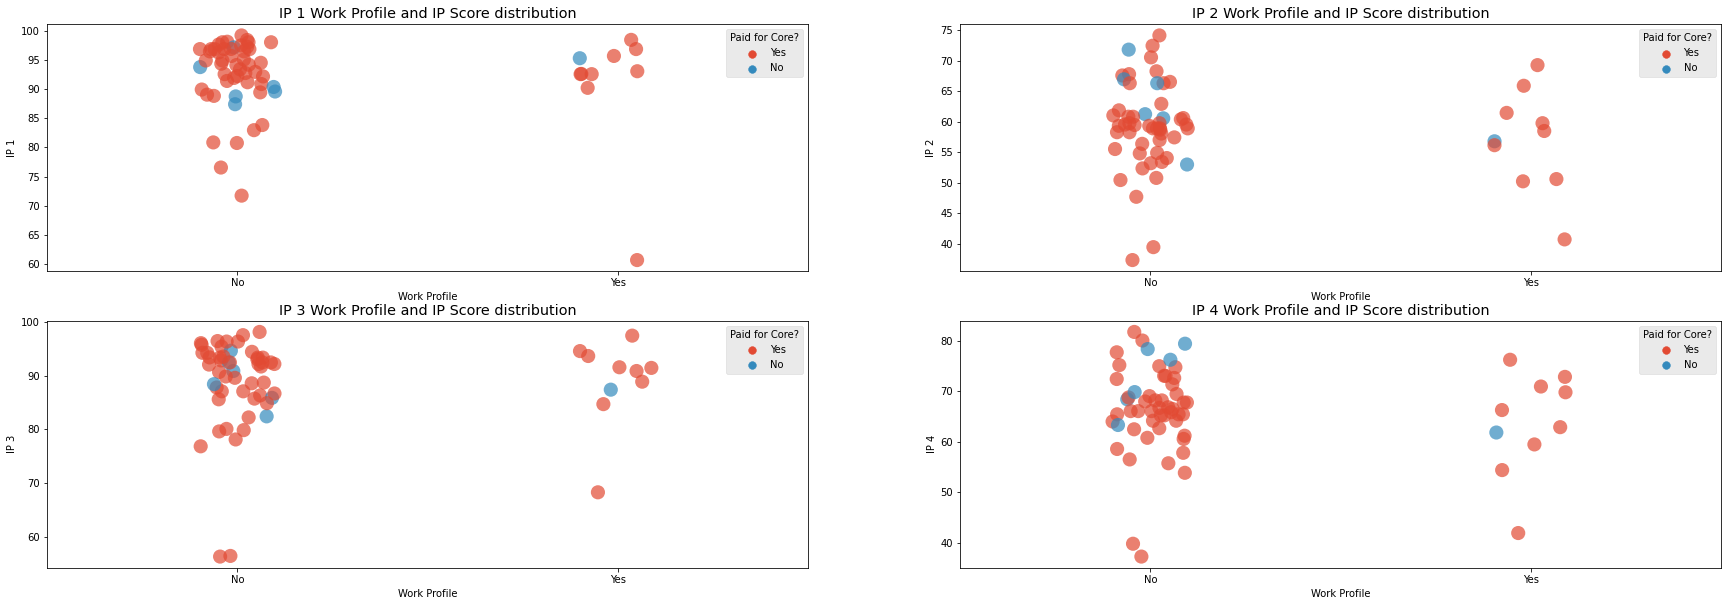

In [ ]:
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(2, 2, figsize=(30,10))
style.use('ggplot')

sns.color_palette("Set2")
axes[0,0].set_title('IP 1 Work Profile and IP Score distribution', color="Black")
sns.stripplot( ax = axes[0,0],x="Work Profile", y="IP 1", data=work_df,sizes=(200,200),alpha= 0.7, hue= 'Paid for Core?')
axes[0,1].set_title('IP 2 Work Profile and IP Score distribution', color="Black")
sns.stripplot( ax = axes[0,1],x="Work Profile", y="IP 2", data=work_df,sizes=(200,200), alpha= 0.7,hue= 'Paid for Core?')
axes[1,0].set_title('IP 3 Work Profile and IP Score distribution', color="Black")
sns.stripplot( ax = axes[1,0],x="Work Profile", y="IP 3", data=work_df, sizes=(200,200),alpha= 0.7,hue= 'Paid for Core?')
axes[1,1].set_title('IP 4 Work Profile and IP Score distribution', color="Black")
sns.stripplot( ax = axes[1,1],x="Work Profile", y="IP 4", data=work_df, sizes=(200,200),alpha= 0.7,hue= 'Paid for Core?')


# Observation 
From the  graphs we note that there is a concentration of students without any work experience as compared to the ones with some, and they have a similar pattern in the way they are performing in their IPs.  They have an average score of 4.3 in the mindset questions. As for the students with work experience, they have some variation as they continue with their IPs, but we do not have enough data to claim that they behave  in a similar pattern.

# Performance 


---



---


For IP 1 we have a cluster that is above 90% in the scores giving a mean of 92% for the entire **No** population. For IP 2 the performance does drop to 56% but comes up to 89% for the third IP. As for the ones with some previous work experience their perfromance is largely comparable with similar variation among themelves.


# Core interest

Analysis of those with no work expreience and there movement to the core program 

In [ ]:
yes_number = yes_work['Work Profile'].count()

In [ ]:
from google.colab import files

yes_work_join = yes_work[(yes_work['Interested in Core?']=='Yes') & (yes_work['Paid for Core?'] == 'Yes')]
yes_work_join.head()

yes_work.to_csv('Work_experience.csv')
files.download('Work_experience.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
yes_work_join.count()

Work Profile           7
IP 1                   7
IP 2                   7
IP 3                   7
IP 4                   7
Interested in Core?    7
Paid for Core?         7
dtype: int64

In [ ]:
no_number = no_work['Work Profile'].count()

In [ ]:
no_work_join = no_work[(no_work['Interested in Core?'] == 'Yes') & (no_work['Paid for Core?'] == 'Yes')]

In [ ]:
#conversion rates for both themes from prep to core
# no work conversion rate, the ones wo were interested in core and actually went into core
x = no_work_join['Work Profile'].count()/no_number
y = yes_work_join['Work Profile'].count()/yes_number

print('Work exprience conversion rate was:', y, "\n Non -experienced students conversion rates was: ", x)

Work exprience conversion rate was: 0.6363636363636364 
 Non -experienced students conversion rates was:  0.7592592592592593


### Take away


---



---


Individuals with no prior work experience are highly likely to an affinity towards going to the core program.
1. *No experience* - 76% CR 
2. *Experience* - 63% CR
* 76% of candidates with no work experience paid for core after showing interest, while 63% of those without any experience showed interest  and paid.

# Education Profile 

---
1. University Gradutes
2. Continuuing university undergraduate
3. High School Graduate
4. Diploma or Certificate holder


In [ ]:
retention_sd.head()

,Category,Education profile,Work Profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Average scale score,Risk 1,Risk 2,Risk 3,IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?,Roll Call
0,Access,UG,No,0.0,5,5,5,5,4,5,4.833333,0.0,1.0,1.0,98.14,74.15,96.50,81.78,Yes,Yes,86
1,Access,UG,No,0.0,3,4,4,5,5,5,4.333333,1.0,1.0,5.0,96.86,72.46,95.45,80.08,Yes,Yes,100
2,Self-sponsored,CUUS,No,9.0,5,4,5,5,5,5,4.833333,1.0,1.0,1.0,97.17,71.82,94.70,79.45,Yes,No,Dropped
3,Access,UG,No,0.0,5,5,5,5,5,5,5.000000,1.0,1.0,4.0,91.93,70.55,91.75,77.75,Yes,Yes,100
4,Access,HSG,Yes,0.0,5,4,5,5,5,5,4.833333,1.0,1.0,4.0,93.08,69.28,90.91,76.27,Yes,Yes,100


In [ ]:
#Creating a new data frame for the education profile
edu_df = retention_sd.iloc[:,[1,3,4,5,6,7,8,9,14,15,16,17,18,19]]
edu_df.head(5)

,Education profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?
0,UG,0.0,5,5,5,5,4,5,98.14,74.15,96.50,81.78,Yes,Yes
1,UG,0.0,3,4,4,5,5,5,96.86,72.46,95.45,80.08,Yes,Yes
2,CUUS,9.0,5,4,5,5,5,5,97.17,71.82,94.70,79.45,Yes,No
3,UG,0.0,5,5,5,5,5,5,91.93,70.55,91.75,77.75,Yes,Yes
4,HSG,0.0,5,4,5,5,5,5,93.08,69.28,90.91,76.27,Yes,Yes


In [ ]:
cat_edu_df = retention_sd.iloc[:,[1]]
edu_pie = cat_edu_df.groupby('Education profile')['Education profile'].count()
edu_pie = pd.DataFrame(edu_pie)
edu_pie.rename(columns={'Education profile': 'Number'}, inplace=True)
edu_pie

,Number
Education profile,
CUUS,11
DIP/CERT,6
HSG,35
UG,10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


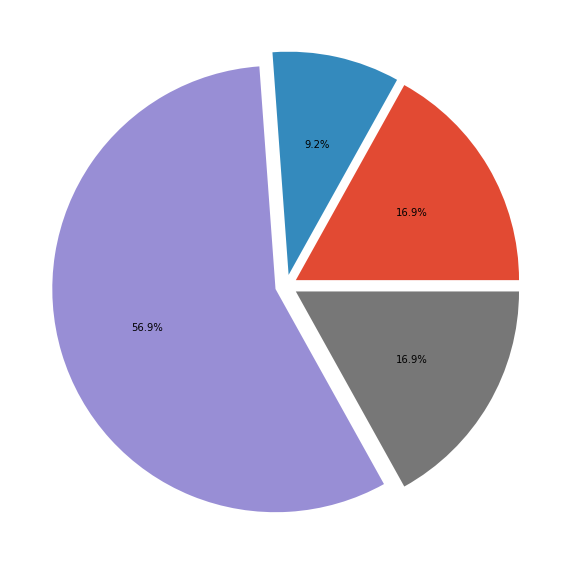

In [ ]:
plt.figure(figsize=(10,15))
labels = edu_pie.keys()
plt.pie(x= edu_pie,autopct="%.1f%%", explode=[0.05]*4);

In [ ]:
edu_df.to_csv('Education_profile.csv')
files.download('Education_profile.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Grouped scores as per the education profile 
edu_df.groupby(['Education profile', 'IP 1','IP 2', 'IP 3','IP 4']).mean()

Lead Score  ...  The harder I work at something, the better I can be at it 
Education profile IP 1  IP 2  IP 3  IP 4               ...                                                            
CUUS              83.85 66.31 88.75 75.21         9.0  ...                                                  5         
                  87.42 66.31 90.91 76.27        14.0  ...                                                  5         
                  89.94 68.27 87.84 75.00        18.0  ...                                                  5         
                  91.41 56.36 88.62 62.71         0.0  ...                                                  4         
                  92.58 54.87 85.63 60.59        18.0  ...                                                  5         
...                                               ...  ...                                                ...         
UG                95.31 56.78 87.43 61.86         9.0  ...                                                  5         
                  96.86 72.46 95.45 80.08         0.0  ...                                                  5         
                  98.05 58.90 93.41 66.10         0.0  ...                                                  5         
                  98.14 74.15 96.50 81.78         0.0  ...                                                  5         
                  98.46 61.44 97.51 69.83         0.0  ...                                                  5         

[62 rows x 7 columns]

In [ ]:
#combined statistical summary of the performance 
edu_df[['Education profile', 'IP 1','IP 2', 'IP 3', 'IP 4']].describe()

,IP 1,IP 2,IP 3,IP 4
count,62.000000,62.000000,62.000000,62.000000
mean,92.284839,58.989516,88.830968,66.106935
std,6.795950,7.342727,8.302450,8.705175
min,60.690000,37.290000,56.290000,37.290000
25%,90.505000,55.667500,86.450000,62.762500
50%,93.965000,59.320000,91.550000,66.420000
75%,96.880000,61.755000,93.570000,71.292500
max,99.220000,74.150000,98.200000,81.780000


In [ ]:
high_gr_df = edu_df[edu_df['Education profile'] == 'HSG'].describe()
#high_gr_df.to_csv('High_school summary.csv')
#files.download('High_school summary.csv')

In [ ]:
# High school graduates summary and interest to join core and paying
high_gr = edu_df[edu_df['Education profile'] == 'HSG']


In [ ]:
high_join = high_gr[(high_gr['Interested in Core?'] == 'Yes') & (high_gr['Paid for Core?'] == 'Yes')]
high_join.head()
#Downloading the csv 
#high_join.to_csv('High school.csv')
#files.download('High school.csv')

,Education profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?
4,HSG,0.0,5,4,5,5,5,5,93.08,69.28,90.91,76.27,Yes,Yes
6,HSG,0.0,4,5,5,5,5,5,91.19,67.80,87.12,73.09,Yes,Yes
7,HSG,0.0,5,5,4,5,5,5,94.37,67.58,92.89,74.79,Yes,Yes
9,HSG,0.0,5,5,5,5,5,5,92.77,66.53,86.36,72.46,Yes,Yes
10,HSG,0.0,4,5,5,5,5,5,90.88,66.31,87.12,73.09,Yes,Yes


In [ ]:
cuus_gr = edu_df[edu_df['Education profile'] == 'CUUS']

In [ ]:
#continuing university undergraduates summary and interest to join core and paying
cuus_join = cuus_gr[(cuus_gr['Interested in Core?'] == 'Yes') & (cuus_gr['Paid for Core?'] == 'Yes')]
#cuus_join.to_csv('Cuus.csv')
#files.download('Cuus.csv')

In [ ]:
ug_gr = edu_df[edu_df['Education profile'] == 'UG']
ug_gr.head()

,Education profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?
0,UG,0.0,5,5,5,5,4,5,98.14,74.15,96.50,81.78,Yes,Yes
1,UG,0.0,3,4,4,5,5,5,96.86,72.46,95.45,80.08,Yes,Yes
3,UG,0.0,5,5,5,5,5,5,91.93,70.55,91.75,77.75,Yes,Yes
8,UG,10.0,4,4,5,5,5,5,93.79,66.95,92.50,78.39,Yes,No
16,UG,0.0,4,5,5,4,4,5,98.46,61.44,97.51,69.83,Yes,Yes


In [ ]:
ug_join = ug_gr[(ug_gr['Interested in Core?'] == 'Yes') & (ug_gr['Paid for Core?'] == 'Yes')]
ug_join.head()
#ug_join.to_csv('ug.csv')
#files.download('ug.csv')

,Education profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?
0,UG,0.0,5,5,5,5,4,5,98.14,74.15,96.50,81.78,Yes,Yes
1,UG,0.0,3,4,4,5,5,5,96.86,72.46,95.45,80.08,Yes,Yes
3,UG,0.0,5,5,5,5,5,5,91.93,70.55,91.75,77.75,Yes,Yes
16,UG,0.0,4,5,5,4,4,5,98.46,61.44,97.51,69.83,Yes,Yes
26,UG,0.0,3,4,5,4,4,5,95.08,59.75,92.11,72.67,Yes,Yes


In [ ]:
dip_crt_gr = edu_df[edu_df['Education profile'] == 'DIP/CERT']

In [ ]:
dip_crt_join = dip_crt_gr[(dip_crt_gr['Interested in Core?'] == 'Yes') & (dip_crt_gr['Paid for Core?'] == 'Yes')]
dip_crt_join.head()
#dip_crt_join.to_csv('dip.csv')
#files.download('dip.csv')

,Education profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?
13,DIP/CERT,17.0,4,4,4,4,4,4,92.62,65.89,91.49,72.88,Yes,Yes
28,DIP/CERT,0.0,3,3,3,3,4,4,95.70,59.53,94.31,66.74,Yes,Yes
30,DIP/CERT,0.0,4,4,4,5,5,5,97.27,59.32,92.22,65.25,Yes,Yes
62,DIP/CERT,18.0,3,3,3,5,5,5,92.58,50.21,91.61,59.50,Yes,Yes


In [ ]:
#Conversion rates for the student profile 
a = ug_join['Education profile'].count()/ug_gr['Education profile'].count()*100
b = dip_crt_join['Education profile'].count()/dip_crt_gr['Education profile'].count()*100
c = cuus_join['Education profile'].count()/ cuus_gr['Education profile'].count()*100
d = high_join['Education profile'].count()/ high_gr['Education profile'].count()*100

#dip_crt_join.count()
#ug_join.count()
#cuus_join.count()
#high_join.count()

print('Conversion rates for Undergraduates: ',a.round(2), "\n Conversion rates diploma and certs: ",b.round(2), "\n Conversion rates for Continuing university students: ",c.round(2), "\n Conversion rates for High school graduates: ", d.round(2))

Conversion rates for Undergraduates:  60.0 
 Conversion rates diploma and certs:  66.67 
 Conversion rates for Continuing university students:  81.82 
 Conversion rates for High school graduates:  82.86


## *Observation*


*   60% of all undergraduates who showed interest in core, paid for the core Program, while 66.67% and 81.82% and 82.86% of diploma CUUS and HSG paid for the program respectively.
The major group that is high susceptible to join the core program is High school graduates. However, noting that majority of the students in this category are Access


In [ ]:
cuus_df = edu_df[edu_df['Education profile'] == 'CUUS'].describe()
ug_df = edu_df[edu_df['Education profile'] == 'UG'].describe()
dip_crt_df = edu_df[edu_df['Education profile'] == 'DIP/CERT'].describe()


In [ ]:
high_gr_df
# this is the statistical sumamry of the data 

,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3.442857,3.971429,4.428571,4.171429,4.571429,4.628571,4.685714,91.596000,57.421714,87.356571,64.316857
std,5.938126,0.857003,1.037126,1.200140,0.884032,0.843163,0.832128,8.014124,7.501570,10.122435,8.992171
min,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.690000,37.290000,56.290000,37.290000
25%,0.000000,3.500000,4.000000,4.000000,4.500000,5.000000,5.000000,89.915000,54.770000,85.335000,62.710000
50%,0.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,93.410000,58.900000,90.720000,66.100000
75%,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,96.680000,60.915000,93.510000,68.935000
max,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,99.220000,69.280000,98.200000,76.270000


In [ ]:
cuus_df

,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,8.090909,4.000000,4.090909,4.363636,4.454545,4.545455,4.818182,93.028182,61.830909,90.924545,69.496364
std,7.286351,0.774597,0.831209,0.674200,0.687552,0.522233,0.404520,4.529642,5.454304,3.636356,6.259826
min,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,83.850000,54.870000,85.630000,60.590000
25%,0.000000,3.500000,3.500000,4.000000,4.000000,4.000000,5.000000,90.675000,58.160000,88.230000,64.755000
50%,9.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,94.190000,59.750000,90.910000,68.220000
75%,14.000000,4.500000,5.000000,5.000000,5.000000,5.000000,5.000000,96.890000,66.310000,94.040000,75.105000
max,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,98.050000,71.820000,96.410000,79.450000


In [ ]:
ug_df


,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.800000,4.300000,4.700000,4.800000,4.800000,4.700000,4.900000,93.877000,62.713000,91.737000,70.569000
std,4.516636,0.823273,0.483046,0.421637,0.421637,0.483046,0.316228,5.341773,7.825338,4.626165,9.191156
min,0.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,80.770000,52.970000,82.250000,53.880000
25%,0.000000,4.000000,4.250000,5.000000,5.000000,4.250000,5.000000,92.395000,57.310000,89.282500,64.037500
50%,0.000000,4.500000,5.000000,5.000000,5.000000,5.000000,5.000000,95.195000,60.595000,92.305000,71.250000
75%,6.750000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,97.752500,69.650000,94.940000,78.230000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,98.460000,74.150000,97.510000,81.780000


In [ ]:
dip_crt_df

,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000
mean,7.000000,3.666667,3.833333,3.833333,4.333333,4.666667,4.666667,92.286667,56.720000,88.75000,62.898333
std,8.579044,0.516398,0.752773,0.752773,0.816497,0.516398,0.516398,4.971276,6.042344,6.12167,6.660764
min,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,82.970000,50.210000,78.14000,54.420000
25%,0.000000,3.250000,3.250000,3.250000,4.000000,4.250000,4.250000,92.580000,51.632500,86.42000,58.825000
50%,3.500000,4.000000,4.000000,4.000000,4.500000,5.000000,5.000000,92.600000,57.055000,91.55000,62.375000
75%,14.500000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,94.930000,59.477500,92.06750,66.367500
max,18.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,97.270000,65.890000,94.31000,72.880000


<Figure size 1080x720 with 0 Axes>

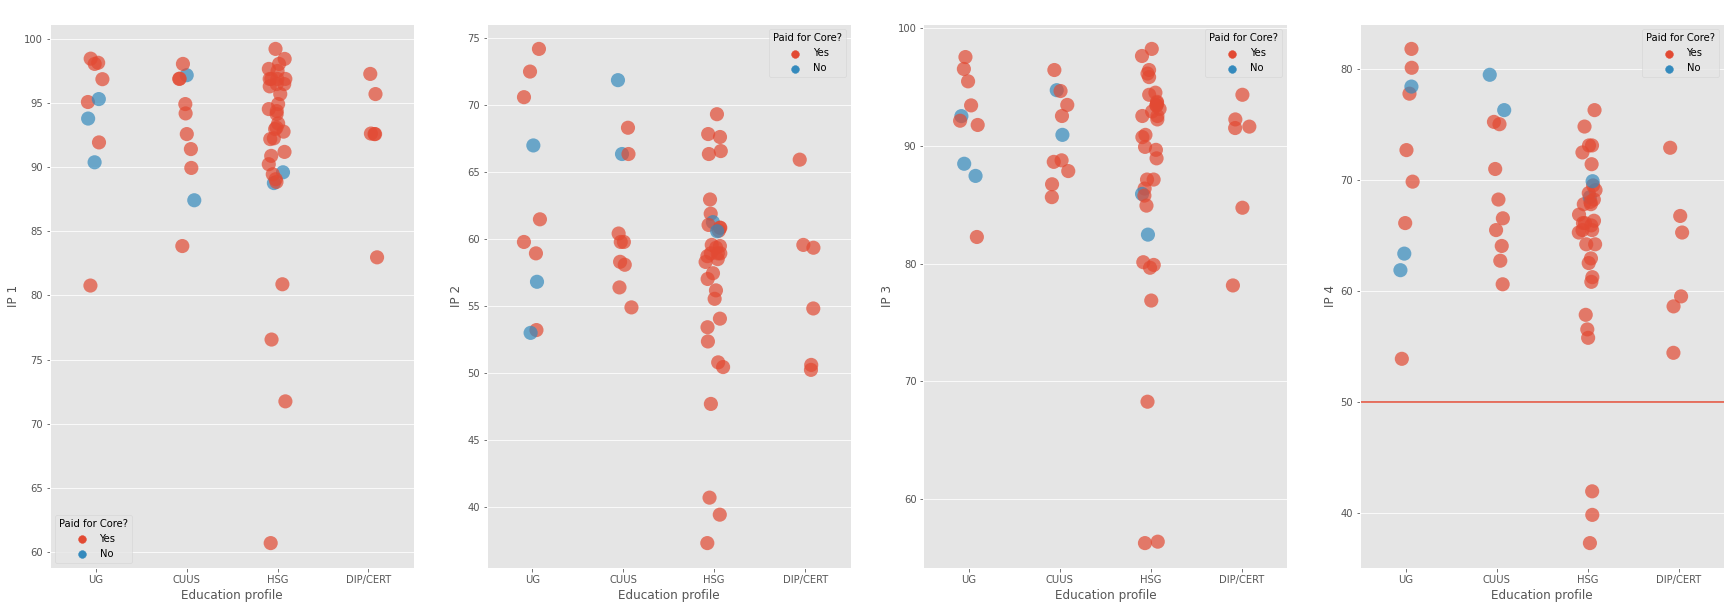

In [ ]:
#Distribution of the students who went to core
plt.figure(figsize=(15,10))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
style.use('ggplot')
axes[0].set_title('IP 1 Education profile and IP Score distribution', color="white")
sns.stripplot(ax = axes[0], x='Education profile', y='IP 1', data=edu_df, sizes=(200,200), alpha= 0.7,hue = 'Paid for Core?')

axes[1].set_title('IP 2 Education profile and IP Score distribution', color="white")
sns.stripplot(ax = axes[1], x='Education profile', y='IP 2', data=edu_df, sizes=(200,200), alpha= 0.7, hue = 'Paid for Core?' )
axes[2].set_title('IP 3 Education profile and IP Score distribution', color="white")
sns.stripplot(ax = axes[2], x='Education profile', y='IP 3', data=edu_df, sizes=(200,200), alpha= 0.7, hue = 'Paid for Core?')
axes[3].set_title('IP 4 Education profile and IP Score distribution', color="white")
sns.stripplot(ax = axes[3], x='Education profile', y='IP 4', data=edu_df, sizes=(200,200), alpha= 0.7, hue = 'Paid for Core?')
axes[3].axhline(y=50)
#sns.stripplot( ax = axes[0],x="Work Profile", y="IP 1", data=work_df,sizes=(20,200),alpha= 0.7 )

# Discussion 
The education profile suggest that the high school graduates group have a predicted pattern in their perfomance, where by they form clusters around the mean score. For the other groups, the population however small we can see that there is a variance in as they are scattered.
despite the level of education the students do have almost similar mean scores , with miniscule deviations and variance

# Sponsorship Profile


---


1.   Access Students
2.   Self-Sponsored




In [ ]:
# Analysis of the perfomance based on the category self sponsored or Access
cat_df = retention_sd.iloc[:,[0,3,4,5,6,7,8,9,13,14,15,16,17,18,19]]
cat_df.head()

,Category,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Risk 3,IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?
0,Access,0.0,5,5,5,5,4,5,1.0,98.14,74.15,96.50,81.78,Yes,Yes
1,Access,0.0,3,4,4,5,5,5,5.0,96.86,72.46,95.45,80.08,Yes,Yes
2,Self-sponsored,9.0,5,4,5,5,5,5,1.0,97.17,71.82,94.70,79.45,Yes,No
3,Access,0.0,5,5,5,5,5,5,4.0,91.93,70.55,91.75,77.75,Yes,Yes
4,Access,0.0,5,4,5,5,5,5,4.0,93.08,69.28,90.91,76.27,Yes,Yes


In [ ]:
cat_df.groupby(['Category', 'IP 1','IP 2', 'IP 3','IP 4']).mean()

Lead Score  ...  Risk 3
Category       IP 1  IP 2  IP 3  IP 4               ...        
Access         76.56 39.41 56.29 39.83         0.0  ...    42.0
               80.77 53.18 82.25 53.88         0.0  ...     1.0
               80.87 54.03 76.86 61.23         0.0  ...     9.0
               90.23 56.14 88.92 62.92         0.0  ...     5.0
               90.88 66.31 87.12 73.09         0.0  ...     1.0
...                                            ...  ...     ...
Self-sponsored 93.79 66.95 92.50 78.39        10.0  ...     4.0
               94.53 58.90 95.81 67.80         9.0  ...     2.0
               94.92 58.05 92.51 65.47         7.0  ...     3.0
               95.31 56.78 87.43 61.86         9.0  ...     1.0
               97.17 71.82 94.70 79.45         9.0  ...     1.0

[62 rows x 8 columns]

In [ ]:
cat_df.describe()

,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Risk 3,IP 1,IP 2,IP 3,IP 4
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,4.508065,4.000000,4.354839,4.274194,4.564516,4.629032,4.741935,4.370968,92.284839,58.989516,88.830968,66.106935
std,6.438544,0.809776,0.925004,1.010913,0.781360,0.706733,0.675945,8.353332,6.795950,7.342727,8.302450,8.705175
min,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.690000,37.290000,56.290000,37.290000
25%,0.000000,3.250000,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000,90.505000,55.667500,86.450000,62.762500
50%,0.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,93.965000,59.320000,91.550000,66.420000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,96.880000,61.755000,93.570000,71.292500
max,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,43.000000,99.220000,74.150000,98.200000,81.780000


In [ ]:
ss_cat_df = cat_df[cat_df['Category']=='Self-sponsored']
ss_cat_df.describe()

,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Risk 3,IP 1,IP 2,IP 3,IP 4
count,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,11.00000,3.882353,4.176471,4.529412,4.588235,4.588235,4.647059,6.823529,87.554706,57.311176,84.971765,64.733529
std,3.91711,0.857493,1.131111,0.717430,0.795206,0.712287,0.701888,12.289402,9.109759,9.521199,9.992454,11.737571
min,7.00000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,60.690000,37.290000,56.410000,37.290000
25%,9.00000,3.000000,3.000000,4.000000,5.000000,4.000000,5.000000,1.000000,87.420000,52.970000,82.450000,60.810000
50%,9.00000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,89.450000,58.050000,87.840000,65.470000
75%,14.00000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,93.790000,66.310000,90.910000,75.000000
max,18.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,43.000000,97.170000,71.820000,95.810000,79.450000


In [ ]:
ss_cat_join = ss_cat_df[(ss_cat_df['Interested in Core?']=='Yes') & (ss_cat_df['Paid for Core?'] == 'Yes')]

In [ ]:
ac_cat_df = cat_df[cat_df['Category']== 'Access']
ac_cat_df.describe()

,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Risk 3,IP 1,IP 2,IP 3,IP 4
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2.055556,4.044444,4.422222,4.177778,4.555556,4.644444,4.777778,3.444444,94.071778,59.623556,90.288889,66.625778
std,5.427437,0.796457,0.839071,1.093137,0.784960,0.712089,0.670444,6.214190,4.684174,6.346843,7.164221,7.345493
min,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.560000,39.410000,56.290000,39.830000
25%,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000,92.580000,56.990000,87.120000,64.040000
50%,0.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,95.080000,59.450000,92.220000,66.530000
75%,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,96.880000,61.440000,94.310000,70.970000
max,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,42.000000,99.220000,74.150000,98.200000,81.780000


In [ ]:
ac_cat_join = ac_cat_df[(ac_cat_df['Interested in Core?']== 'Yes') & (ac_cat_df['Paid for Core?'] == 'Yes')]

<Figure size 1080x720 with 0 Axes>

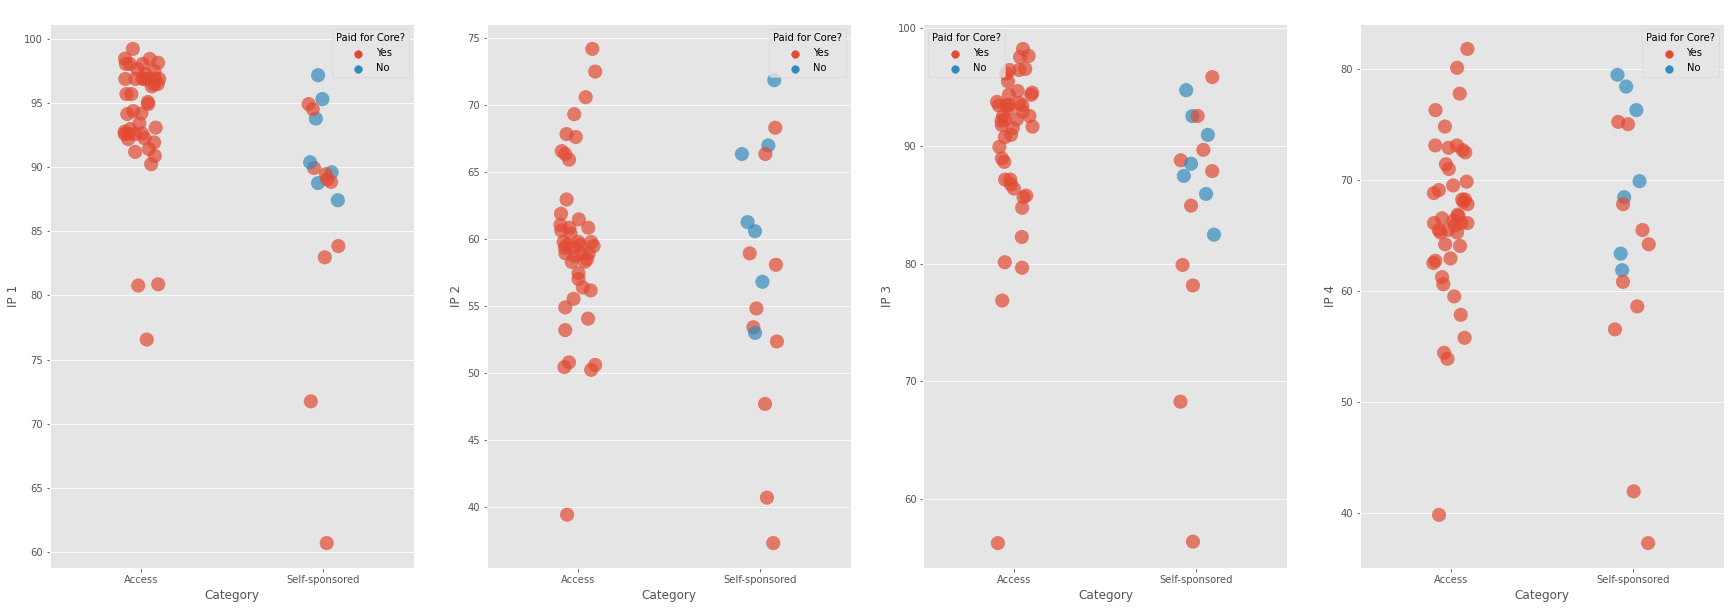

In [ ]:
plt.figure(figsize=(15,10))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
plt.style.use('ggplot')
axes[0].set_title('IP 1 Category and IP Score distribution', color="white")
sns.stripplot(ax = axes[0], x='Category', y='IP 1', data=cat_df, sizes=(200,200), alpha= 0.7,hue = 'Paid for Core?')
axes[1].set_title('IP 2 Category and IP Score distribution', color="white")
sns.stripplot(ax = axes[1], x='Category', y='IP 2', data=cat_df, sizes=(200,200), alpha= 0.7, hue = 'Paid for Core?')
axes[2].set_title('IP 3 Category and IP Score distribution', color="white")
sns.stripplot(ax = axes[2], x='Category', y='IP 3', data=cat_df, sizes=(200,200), alpha= 0.7,hue = 'Paid for Core?')
axes[3].set_title('IP 4 Category and IP Score distribution', color="white")
sns.stripplot(ax = axes[3], x='Category', y='IP 4', data=cat_df, sizes=(200,200), alpha= 0.7,hue = 'Paid for Core?')

# Conversion rates 

In [ ]:
ss_cat_df['Category'].count()
ac_cat_df['Category'].count()

ac_cat_join['Category'].count()
ss_cat_join['Category'].count()

access_conv = ac_cat_join['Category'].count()/ac_cat_df['Category'].count()*100
self_conv = ss_cat_join['Category'].count()/ss_cat_df['Category'].count()*100

print("Access conversion rate: ", access_conv,"\n Self-sponsored conversion rate: ", self_conv)

Access conversion rate:  91.11111111111111 
 Self-sponsored conversion rate:  41.17647058823529


# Discussion 
Access students are performing better as measured by the IP grading, they exhibit similar patterns with little varinace or deviation as opposed to the self-sponosred students, their perfromance is scatterd, thus giving a wide variance in their overall score.

# Mindset Questions

In [ ]:
retention = gc.open_by_url("https://docs.google.com/spreadsheets/d/1zHlkI4NeWrX6oY5qXMi0LJJqa9boNBdow3WWt2SMM_A/edit#gid=0")

In [ ]:
ws = retention.worksheet('Combined Ed and Work')
retention_sd_1 = get_as_dataframe(ws)

In [ ]:
retention_sd_1.head()

,Name,Class,e-mail,Category,Education profile,Work Profile,Lead Score,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",Average scale score,Risk 1,Risk 2,Risk 3,Risk 4,IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?,Roll Call
0,Thomas,Oduor,oduorthomas14@gmail.com,Access,UG,No,0.0,5,5,5,5,4,5,4.833333,0.0,1.0,1.0,0,98.14,74.15,96.50,81.78,Yes,Yes,86
1,Sheilla,Wangare Njoroge,sheillan.njoroge@gmail.com,Access,UG,No,0.0,3,4,4,5,5,5,4.333333,1.0,1.0,5.0,1,96.86,72.46,95.45,80.08,Yes,Yes,100
2,Brian,Njogu,briannjogu85@gmail.com,Self-sponsored,CUUS,No,9.0,5,4,5,5,5,5,4.833333,1.0,1.0,1.0,No record,97.17,71.82,94.70,79.45,Yes,No,Dropped
3,Ariso,Okanga Imelda,arisodee@gmail.com,Access,UG,No,0.0,5,5,5,5,5,5,5.000000,1.0,1.0,4.0,1,91.93,70.55,91.75,77.75,Yes,Yes,100
4,Barnabas,Kamau Nyambura,bkamau032@gmail.com,Access,HSG,Yes,0.0,5,4,5,5,5,5,4.833333,1.0,1.0,4.0,1,93.08,69.28,90.91,76.27,Yes,Yes,100


In [ ]:
retention_sd_1.drop(['Name', 'Class', 'e-mail'], axis= 1, inplace= True)
retention_sd_1 = retention_sd_1.dropna()

In [ ]:
retention_sd_1.isnull().sum()

Category                                                                           0
Education profile                                                                  0
Work Profile                                                                       0
Lead Score                                                                         0
On a scale of 5, what's your ability to work independently                         0
I follow through with my goals even when going through tough times                 0
I believe failure is a part of the learning process                                0
I work as hard as I can, ask questions, and make use of all available resources    0
Even if I wasn’t “born talented” I can still develop talent for something          0
The harder I work at something, the better I can be at it                          0
Average scale score                                                                0
Risk 1                                                           

<Figure size 1080x1440 with 0 Axes>

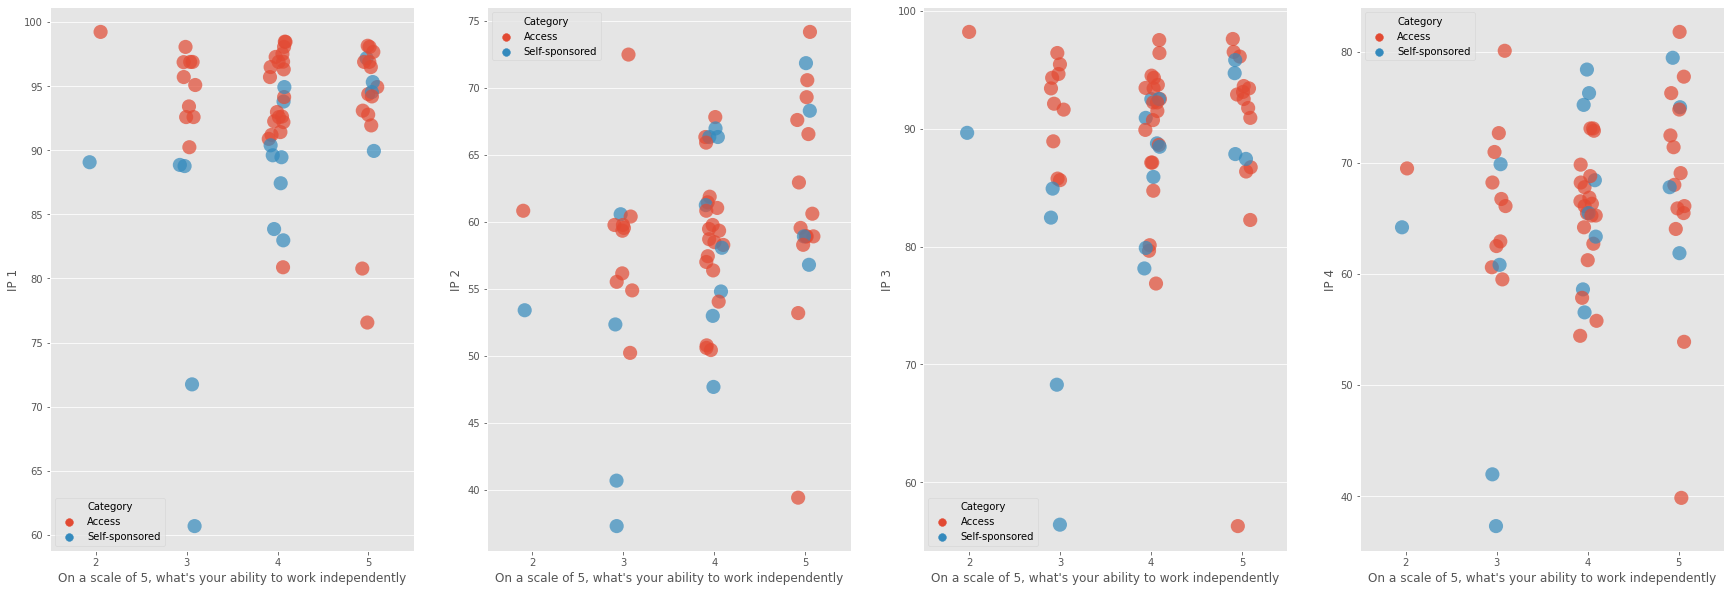

In [ ]:
#Performance categorized in to Access and Self-Sponsored
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
sns.stripplot(ax = axes[0], x=retention_sd_1["On a scale of 5, what's your ability to work independently"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1], x=retention_sd_1["On a scale of 5, what's your ability to work independently"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[2], x=retention_sd_1["On a scale of 5, what's your ability to work independently"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[3], x=retention_sd_1["On a scale of 5, what's your ability to work independently"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)

<Figure size 1080x1440 with 0 Axes>

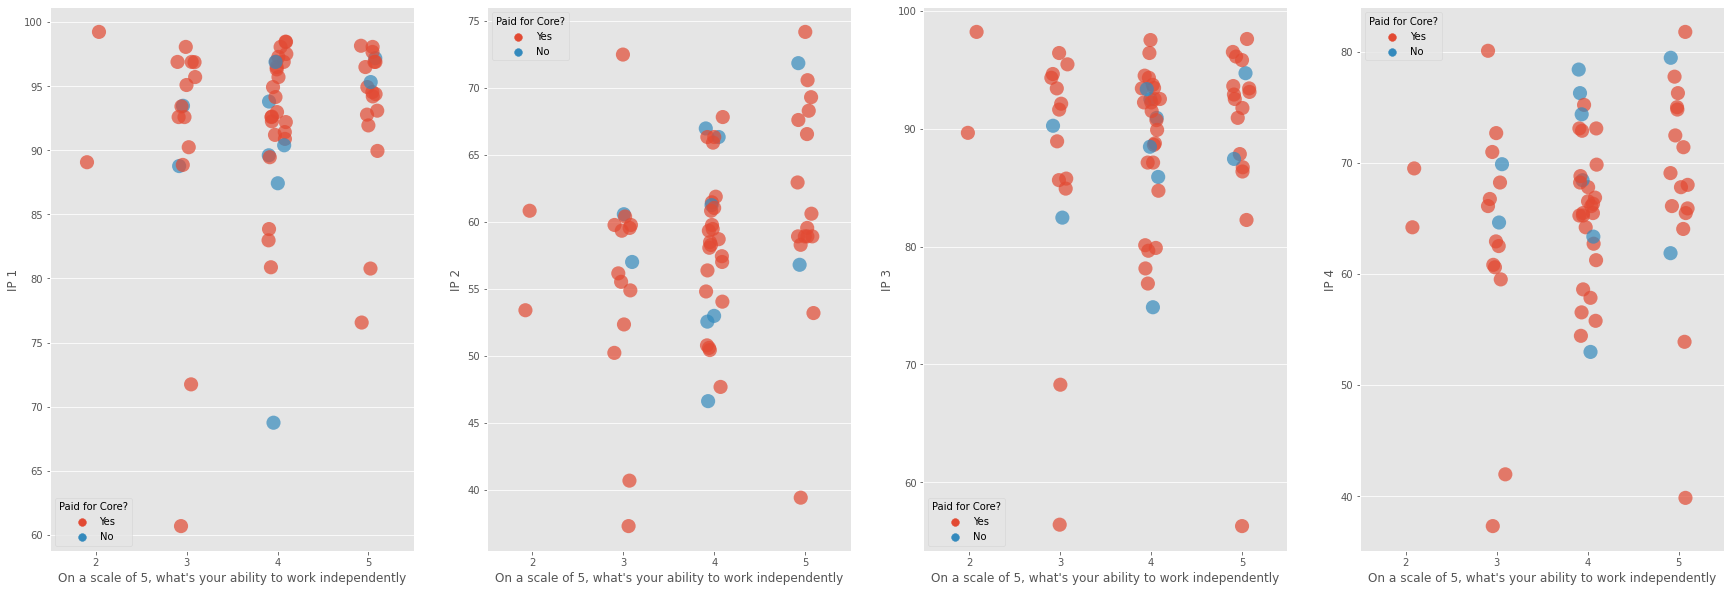

In [ ]:
# Relation to the core intereset
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
sns.stripplot(ax = axes[0], x=retention_sd_1["On a scale of 5, what's your ability to work independently"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1], x=retention_sd_1["On a scale of 5, what's your ability to work independently"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[2], x=retention_sd_1["On a scale of 5, what's your ability to work independently"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[3], x=retention_sd_1["On a scale of 5, what's your ability to work independently"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)

In [ ]:
#COnversion rates
mind_set_df =retention_sd_1.iloc[:,[4,5,6,7,8,9,15,16,17,18,19,20,21]]
mind_set_df

,"On a scale of 5, what's your ability to work independently",I follow through with my goals even when going through tough times,I believe failure is a part of the learning process,"I work as hard as I can, ask questions, and make use of all available resources",Even if I wasn’t “born talented” I can still develop talent for something,"The harder I work at something, the better I can be at it",IP 1,IP 2,IP 3,IP 4,Interested in Core?,Paid for Core?,Roll Call
0,5,5,5,5,4,5,98.14,74.15,96.50,81.78,Yes,Yes,86
1,3,4,4,5,5,5,96.86,72.46,95.45,80.08,Yes,Yes,100
2,5,4,5,5,5,5,97.17,71.82,94.70,79.45,Yes,No,Dropped
3,5,5,5,5,5,5,91.93,70.55,91.75,77.75,Yes,Yes,100
4,5,4,5,5,5,5,93.08,69.28,90.91,76.27,Yes,Yes,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,3,3,3,5,5,5,92.58,50.21,91.61,59.50,Yes,Yes,100
63,4,5,5,5,5,5,89.45,47.67,79.88,56.53,Yes,Yes,97
65,3,3,3,3,3,3,60.69,40.68,68.28,41.95,No,Yes,Dropped
67,5,5,5,5,5,5,76.56,39.41,56.29,39.83,No,Yes,Dropped


In [ ]:
independent_df = mind_set_df.iloc[:,[0,6,7,8,9,10,11]]
independent_df.count()
independent_df_join = independent_df[(independent_df['Interested in Core?']=='Yes') & (independent_df['Paid for Core?'] == "Yes")]
independent_df_join.count()

#Conversion rate for those who showed ability to work Independtly
independent_df_join.count()/independent_df.count()

On a scale of 5, what's your ability to work independently    48
IP 1                                                          48
IP 2                                                          48
IP 3                                                          48
IP 4                                                          48
Interested in Core?                                           48
Paid for Core?                                                48
dtype: int64

<Figure size 1080x1440 with 0 Axes>

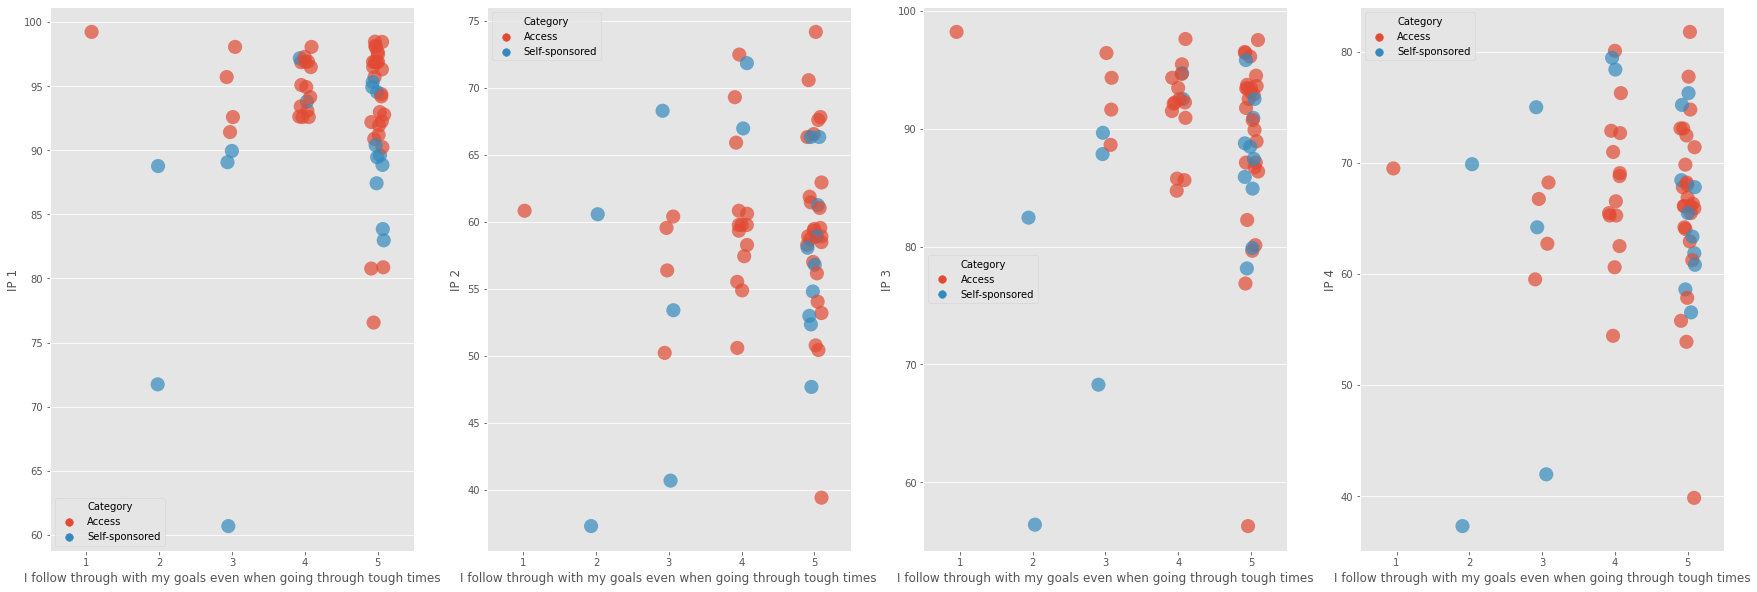

In [ ]:
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
sns.stripplot(ax = axes[0], x=retention_sd_1["I follow through with my goals even when going through tough times"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1], x=retention_sd_1["I follow through with my goals even when going through tough times"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[2], x=retention_sd_1["I follow through with my goals even when going through tough times"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[3], x=retention_sd_1["I follow through with my goals even when going through tough times"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)

<Figure size 1080x1440 with 0 Axes>

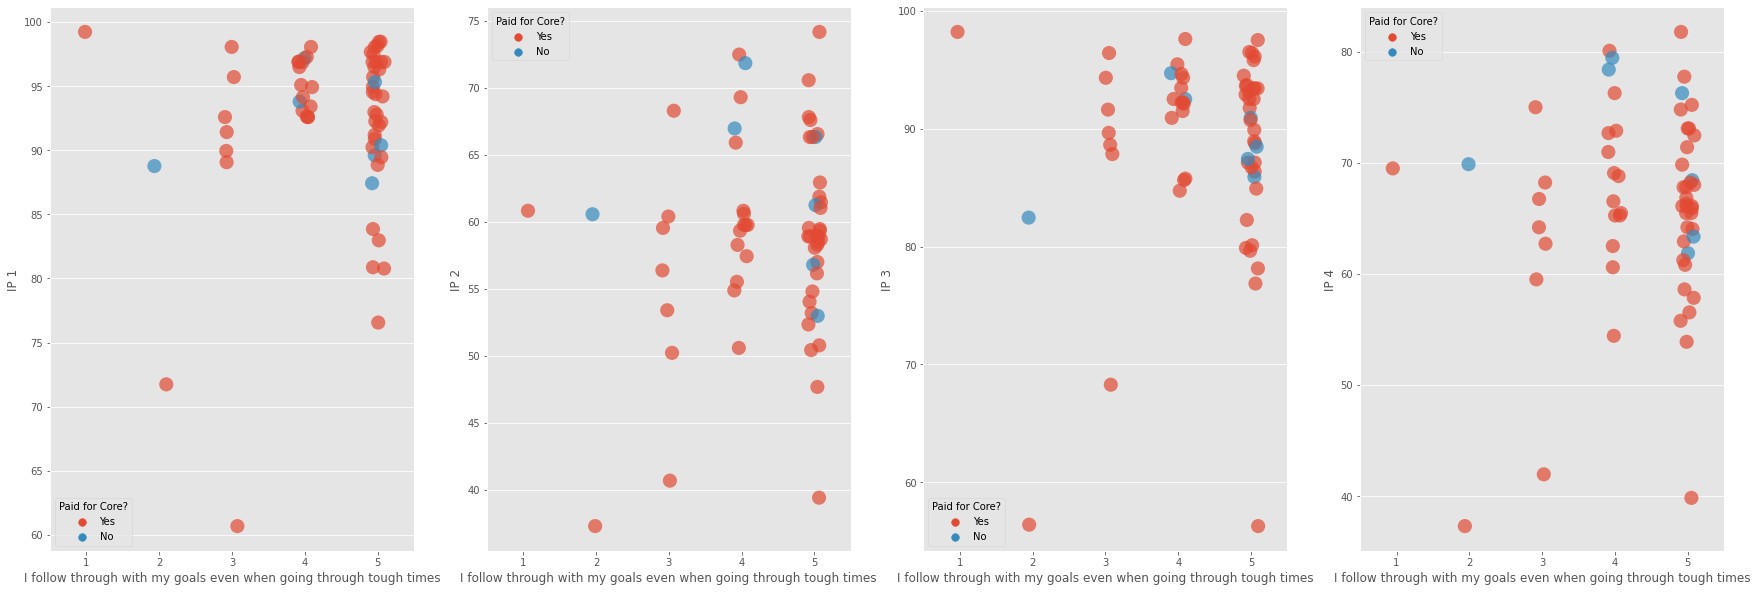

In [ ]:
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
sns.stripplot(ax = axes[0], x=retention_sd_1["I follow through with my goals even when going through tough times"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1], x=retention_sd_1["I follow through with my goals even when going through tough times"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[2], x=retention_sd_1["I follow through with my goals even when going through tough times"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[3], x=retention_sd_1["I follow through with my goals even when going through tough times"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7);

<Figure size 1080x1440 with 0 Axes>

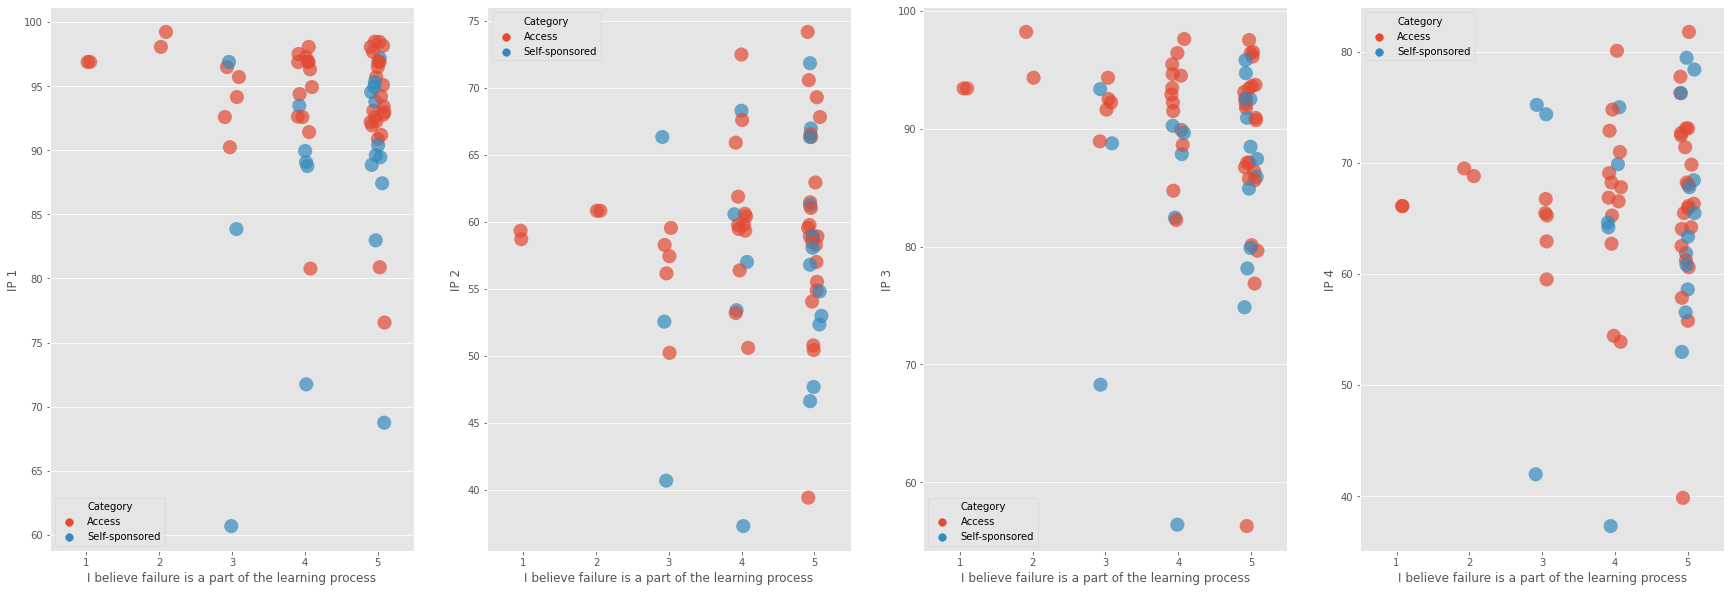

In [ ]:
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
sns.stripplot(ax = axes[0], x=retention_sd_1["I believe failure is a part of the learning process"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1], x=retention_sd_1["I believe failure is a part of the learning process"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[2], x=retention_sd_1["I believe failure is a part of the learning process"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[3], x=retention_sd_1["I believe failure is a part of the learning process"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)

<Figure size 1080x1440 with 0 Axes>

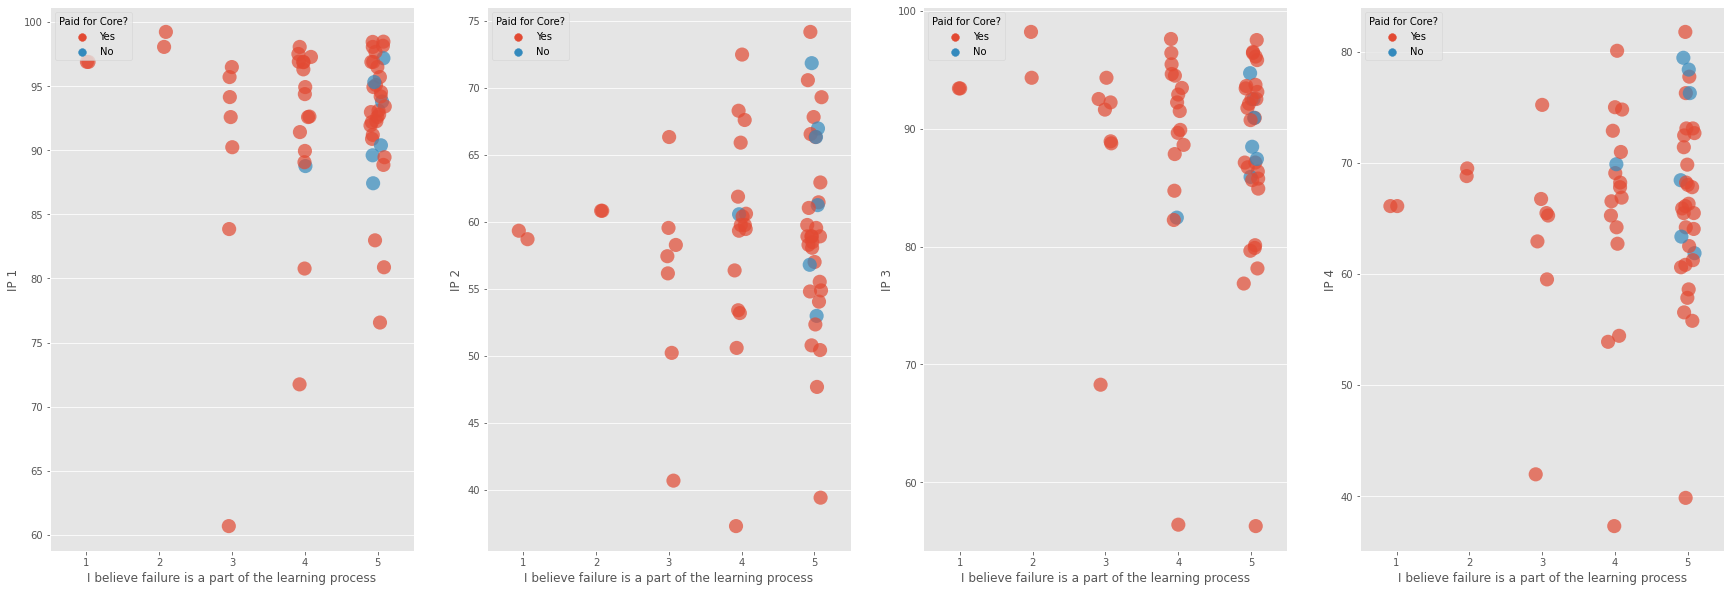

In [ ]:
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(1, 4, figsize=(30,10))
sns.stripplot(ax = axes[0], x=retention_sd_1["I believe failure is a part of the learning process"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1], x=retention_sd_1["I believe failure is a part of the learning process"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[2], x=retention_sd_1["I believe failure is a part of the learning process"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[3], x=retention_sd_1["I believe failure is a part of the learning process"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)

<Figure size 1080x1440 with 0 Axes>

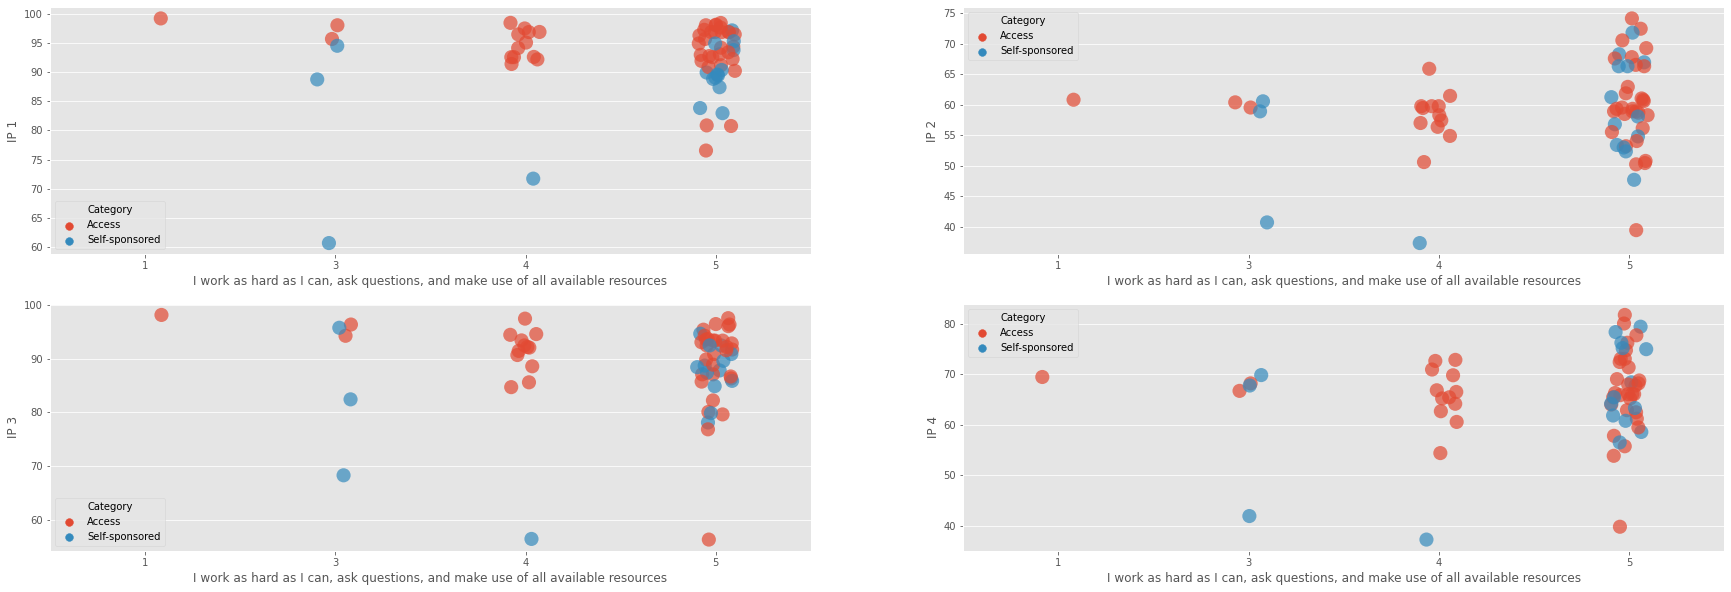

In [ ]:
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(2, 2, figsize=(30,10))
sns.stripplot(ax = axes[0,0], x=retention_sd_1["I work as hard as I can, ask questions, and make use of all available resources"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[0,1], x=retention_sd_1["I work as hard as I can, ask questions, and make use of all available resources"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1,0], x=retention_sd_1["I work as hard as I can, ask questions, and make use of all available resources"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1,1], x=retention_sd_1["I work as hard as I can, ask questions, and make use of all available resources"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)

<Figure size 1080x1440 with 0 Axes>

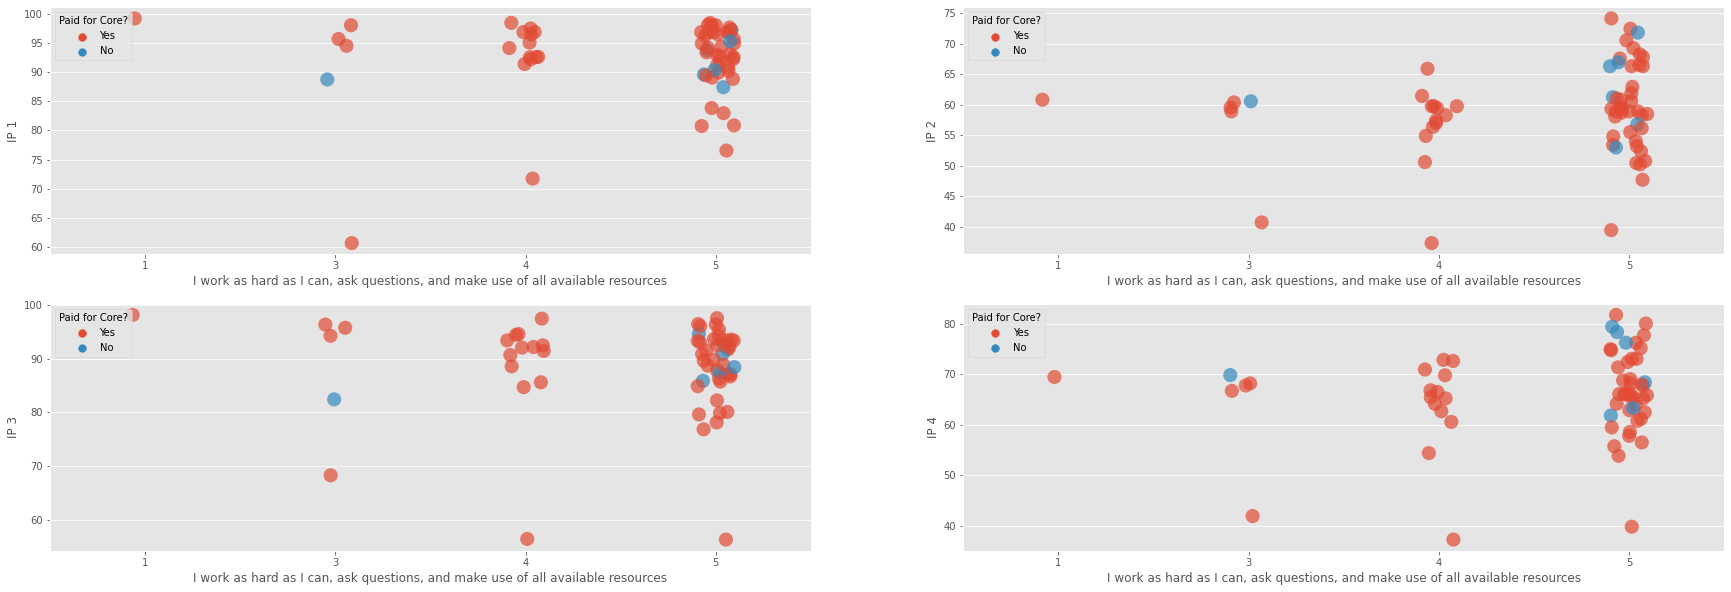

In [ ]:
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(2, 2, figsize=(30,10))
sns.stripplot(ax = axes[0,0], x=retention_sd_1["I work as hard as I can, ask questions, and make use of all available resources"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[0,1], x=retention_sd_1["I work as hard as I can, ask questions, and make use of all available resources"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1,0], x=retention_sd_1["I work as hard as I can, ask questions, and make use of all available resources"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1,1], x=retention_sd_1["I work as hard as I can, ask questions, and make use of all available resources"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)

<Figure size 1080x1440 with 0 Axes>

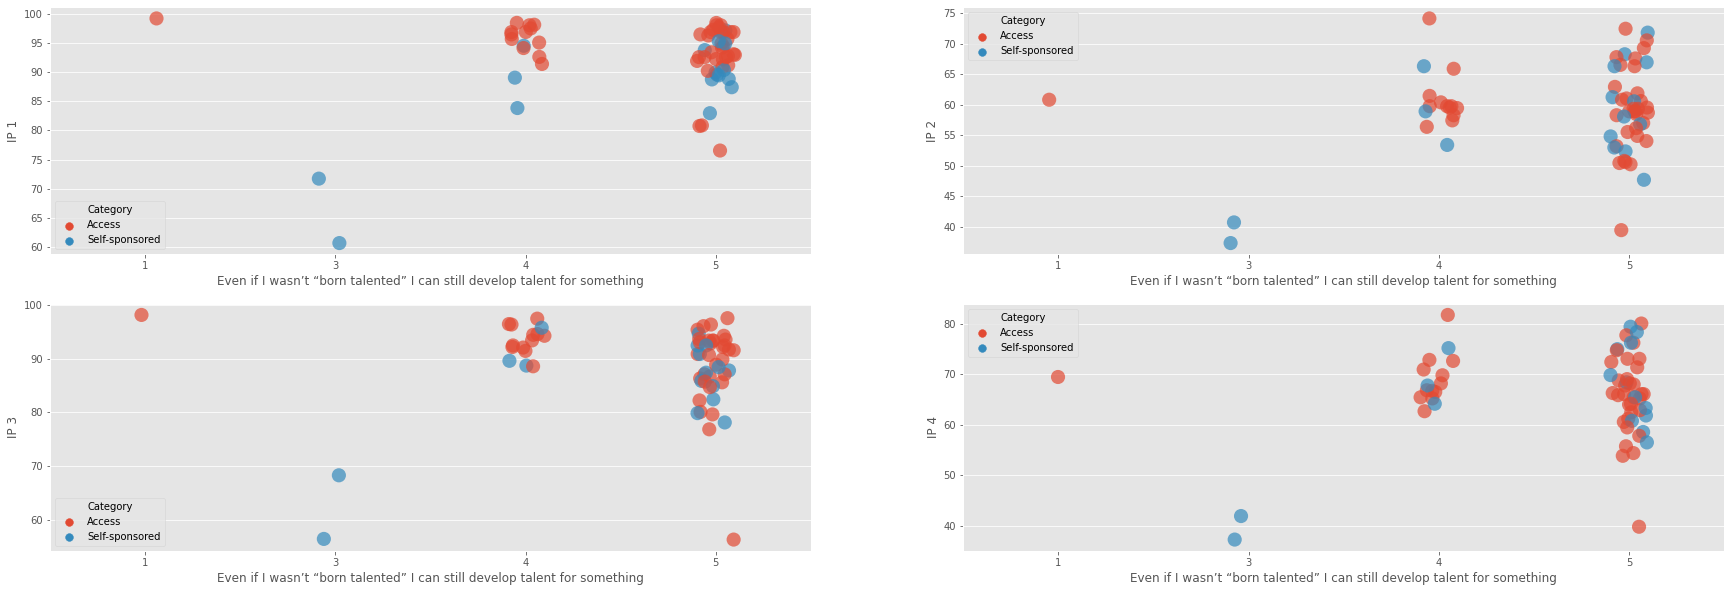

In [ ]:
 
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(2, 2, figsize=(30,10))
sns.stripplot(ax = axes[0,0], x=retention_sd_1["Even if I wasn’t “born talented” I can still develop talent for something"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[0,1], x=retention_sd_1["Even if I wasn’t “born talented” I can still develop talent for something"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1,0], x=retention_sd_1["Even if I wasn’t “born talented” I can still develop talent for something"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1,1], x=retention_sd_1["Even if I wasn’t “born talented” I can still develop talent for something"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)

<Figure size 1080x1440 with 0 Axes>

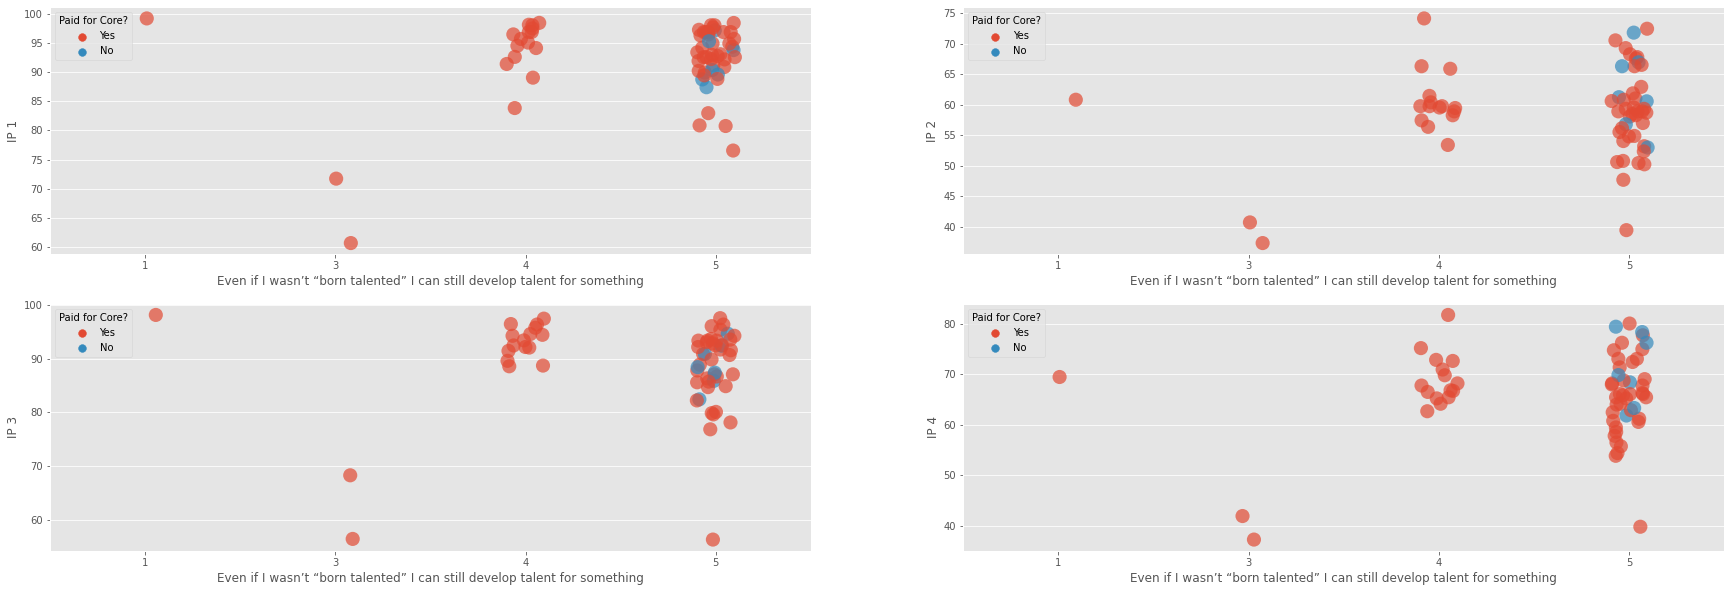

In [ ]:
 
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(2, 2, figsize=(30,10))
sns.stripplot(ax = axes[0,0], x=retention_sd_1["Even if I wasn’t “born talented” I can still develop talent for something"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[0,1], x=retention_sd_1["Even if I wasn’t “born talented” I can still develop talent for something"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1,0], x=retention_sd_1["Even if I wasn’t “born talented” I can still develop talent for something"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1,1], x=retention_sd_1["Even if I wasn’t “born talented” I can still develop talent for something"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)

In [ ]:
 
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(2, 2, figsize=(30,10))
sns.stripplot(ax = axes[0,0], x=retention_sd_1["Lead Score"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[0,1], x=retention_sd_1["Lead Score"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1,0], x=retention_sd_1["Lead Score"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)
sns.stripplot(ax = axes[1,1], x=retention_sd_1["Lead Score"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Category', alpha=0.7)

<Figure size 1080x1440 with 0 Axes>

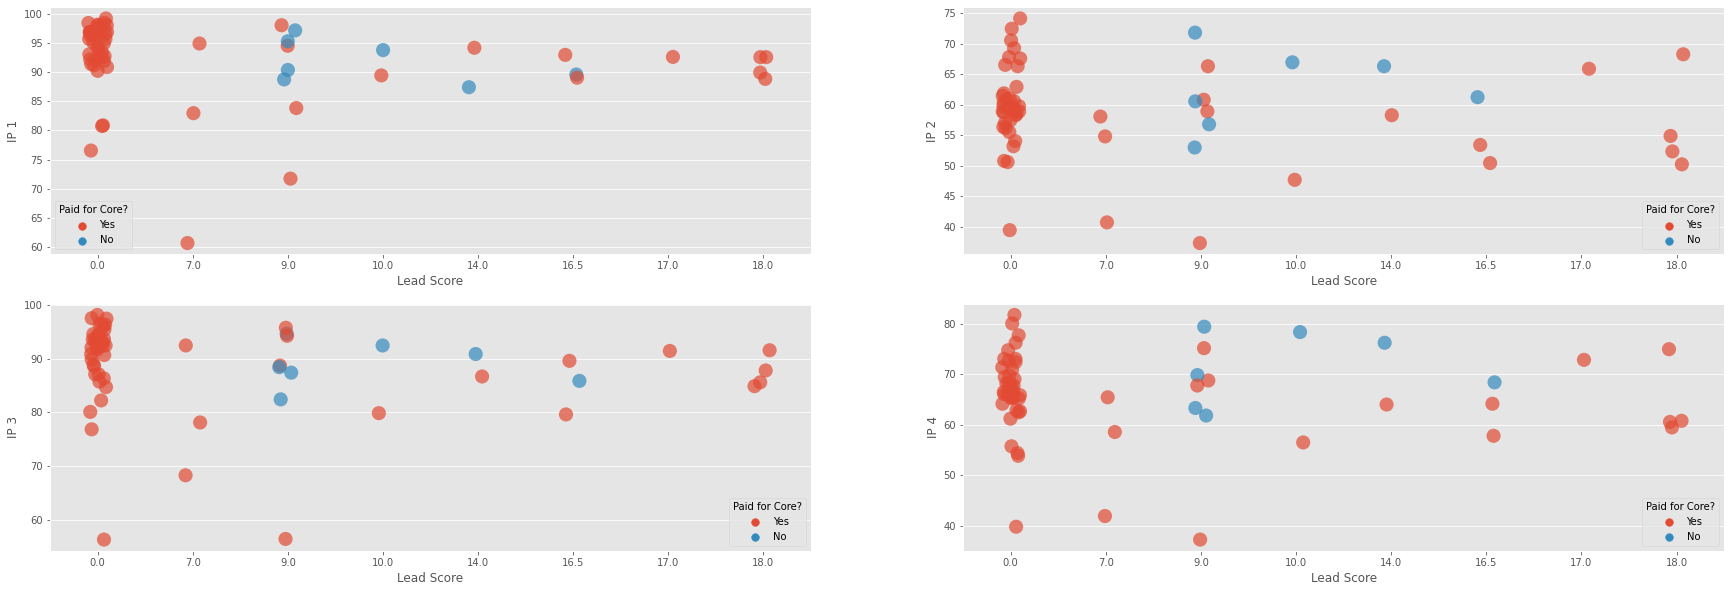

In [ ]:
 
plt.figure(figsize=(15,20))
fig, axes = plt.subplots(2, 2, figsize=(30,10))
sns.stripplot(ax = axes[0,0], x=retention_sd_1["Lead Score"], y='IP 1', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[0,1], x=retention_sd_1["Lead Score"], y='IP 2', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1,0], x=retention_sd_1["Lead Score"], y='IP 3', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)
sns.stripplot(ax = axes[1,1], x=retention_sd_1["Lead Score"], y='IP 4', data=retention_sd_1,sizes=(200,200), hue= 'Paid for Core?', alpha=0.7)

In [ ]:
df2 = pd.DataFrame(retention_sd.iloc[:,[3,7,8,9,10,11,12,13,14,15,16,17]])
df2.head() #selecting the rows and columns for the risk and result(IP)
#from google.colab import files
#df2.to_csv("Categor rsik.csv")
#files.download("Categor rsik.csv")

In [ ]:
df2.iloc[-1:]

In [ ]:
df2.columns


In [ ]:
df2[["Failure", "Ask", "Development", "Hard-work", "Average scale score", "Risk_1 ", "Risk_2", "Risk_3", "IP 1", "IP 2","IP 3"]].corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df2[["Failure", "Ask", "Development", "Hard-work", "Risk_1 ","IP 1", "IP 2","IP 3"]].corr(), annot=True)


In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df2[["Failure", "Ask", "Development", "Hard-work", "Risk_1 ","IP 1", "IP 2","IP 3"]].corr(), annot=True)


In [ ]:
df2[["Average scale score", "Risk_3","IP 1", "IP 2","IP 3"]].corr()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df2[["Average scale score", "Risk_3","IP 1", "IP 2","IP 3"]].corr(), annot=True)

In [ ]:
plt.figure(figsize=(10,5))
sns.relplot(x="IP 3",y="Risk_3", data= df2,alpha= 0.7,s=100,hue='Category');

sns.relplot(x="IP 1",y="Risk_1 ", data= df2,alpha= 0.7,s=100,hue='Category',sizes=(20,200))


In [ ]:
df2.groupby(["Category", "Risk_1 "]).mean()
#the ones with a scale of 0 are 

In [ ]:
sns.countplot(df2['Category'],palette= 'Set1');

In [ ]:
 np.log(df2['IP 3'])
np.log(df2['Risk_3'])

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(np.log(df2['IP 3']),np.log(df2['Risk_3']));

In [ ]:
np.log(df2[['Failure', 'Ask','Development', 'Hard-work', 'Average scale score','Risk_1 ','Risk_2','Risk_3','IP 1','IP 2','IP 3']]).corr()

In [ ]:
df2.columns

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(np.log(df2[['Failure', 'Ask','Development', 'Hard-work', 'Average scale score','Risk_1 ','Risk_2','Risk_3','IP 1','IP 2','IP 3']]).corr(),annot=True)

In [ ]:
np.log(df2[['Average scale score','Risk_2','IP 1','IP 2']]).corr()

In [ ]:
sns.heatmap(np.log(df2[['Average scale score','Risk_2','IP 1','IP 2']]).corr(),annot=True)

In [ ]:
plt.scatter(np.log(df2['IP 1']), np.log(df2['Risk_1 ']))

In [ ]:
plt.scatter(np.log(df2['IP 2']), np.log(df2['Risk_2']))
plt.ylim(-0.1, 3.8)
plt.xlim(3.5,4.4)

In [ ]:
fig_1.savefig('Data Science Applications.png')
files.download('Data Science Applications.png')